In [10]:
#  let's find the correct momentum for a circular orbit in XY
from math import pi, sqrt

pos_x = 3.0
pos_y = 2.5
charge = -4.8e-10
mass = 9.8e-28
momentum_y = 3.92e-19
field_x = lambda x, y: 8 * (x - 2.5) / ( (x - 2.5)**2 + (y - 2.5)**2 )**(3/2)
field_y = lambda x, y: 8 * (y - 2.5) / ( (x - 2.5)**2 + (y - 2.5)**2 )**(3/2)
pot_en = lambda x, y: 8 * charge * ((x - 2.5)**2 + (y - 2.5)**2) ** (-1/2)
orbit_radius = pos_x - 2.5
force = abs(charge*field_x(pos_x, pos_y))
v = sqrt(force/mass * orbit_radius)
good_momentum = v*mass
print(good_momentum)


2.7434285119171595e-18


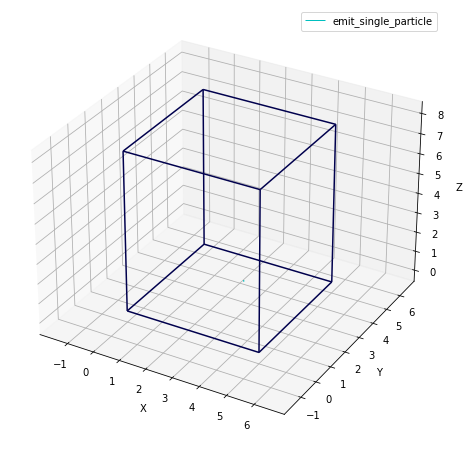

### Config:
time_grid = TimeGridConf(total=3e-09, save_step=3e-11, step=3e-12)
spatial_mesh = SpatialMeshConf(size=array([5., 5., 8.]), step=array([0.5, 0.5, 0.5]))
sources = [ParticleSourceConf(name='emit_single_particle', shape=Box(origin=array([3. , 2.5, 1. ]), size=array([0.01, 0.01, 0.01])), initial_particles=1, particles_to_generate_each_step=0, momentum=array([0.0000e+00, 2.7434e-18, 1.7700e-19]), temperature=0.0, charge=-4.8e-10, mass=9.8e-28)]
inner_regions = []
output_file = OutputFileConf(prefix='single_particle_in_radial_el_field_', suffix='.h5', format_='history')
boundary_conditions = BoundaryConditionsConf(right=0.0, left=0.0, bottom=0.0, top=0.0, near=0.0, far=0.0)
particle_interaction_model = ParticleInteractionModelConf(model='noninteracting')
external_fields = [ExternalElectricFieldExpressionConf(name='el_radial', field=ExternalElectricFieldTinyexpr(electric_field_x='8 * (x - 2.5) / ( (x - 2.5)**2 + (y - 2.5)**2 )**(3/2)', electric_field_y='8 * (y - 2.5) / ( (x - 2.5

In [12]:
from ef.config.config import Config
from ef.config.visualizer import Visualizer3d
conf = Config.from_fname("single_particle_in_radial_electric_field.conf")
conf.output_file.format_ = 'history'                                                #All data store in one file
conf.visualize_all(Visualizer3d())
print(conf)

In [13]:
from ef.runner import Runner
Runner(conf.make(), output_writer=conf.output_file.make()).start()


  Detected a Hermitian matrix
Writing initial fields to file
Writing step 0 to file
Time step from 9 to 10 of 1000
Writing step 10 to file
Time step from 19 to 20 of 1000
Writing step 20 to file
Time step from 29 to 30 of 1000
Writing step 30 to file
Time step from 39 to 40 of 1000
Writing step 40 to file
Time step from 49 to 50 of 1000
Writing step 50 to file
Time step from 59 to 60 of 1000
Writing step 60 to file
Time step from 69 to 70 of 1000
Writing step 70 to file
Time step from 79 to 80 of 1000
Writing step 80 to file
Time step from 89 to 90 of 1000
Writing step 90 to file
Time step from 99 to 100 of 1000
Writing step 100 to file
Time step from 109 to 110 of 1000
Writing step 110 to file
Time step from 119 to 120 of 1000
Writing step 120 to file
Time step from 129 to 130 of 1000
Writing step 130 to file
Time step from 131 to 132 of 1000

/zfs/store5.hydra.local/user/a/aboytsov/ef_python/src/ef/output/history.py:47: H5pyDeprecationWarning: other_ds.dims.create_scale(ds, name) is deprecated. Use ds.make_scale(name) instead.
  h['particles/position'].dims.create_scale(h['particles/ids'], 'ids')
/zfs/store5.hydra.local/user/a/aboytsov/ef_python/src/ef/output/history.py:50: H5pyDeprecationWarning: other_ds.dims.create_scale(ds, name) is deprecated. Use ds.make_scale(name) instead.
  h['particles/position'].dims.create_scale(h['time'], 'time')
/zfs/store5.hydra.local/user/a/aboytsov/ef_python/src/ef/output/history.py:53: H5pyDeprecationWarning: other_ds.dims.create_scale(ds, name) is deprecated. Use ds.make_scale(name) instead.
  h['particles/position'].dims.create_scale(h['particles/coordinates'], 'coordinates')
/zfs/store5.hydra.local/user/a/aboytsov/ef_python/src/ef/output/history.py:57: H5pyDeprecationWarning: other_ds.dims.create_scale(ds, name) is deprecated. Use ds.make_scale(name) instead.
  h['particles/momentum'].d

Time step from 139 to 140 of 1000
Writing step 140 to file
Time step from 149 to 150 of 1000
Writing step 150 to file
Time step from 159 to 160 of 1000
Writing step 160 to file
Time step from 169 to 170 of 1000
Writing step 170 to file
Time step from 179 to 180 of 1000
Writing step 180 to file
Time step from 189 to 190 of 1000
Writing step 190 to file
Time step from 199 to 200 of 1000
Writing step 200 to file
Time step from 209 to 210 of 1000
Writing step 210 to file
Time step from 219 to 220 of 1000
Writing step 220 to file
Time step from 229 to 230 of 1000
Writing step 230 to file
Time step from 239 to 240 of 1000
Writing step 240 to file
Time step from 249 to 250 of 1000
Writing step 250 to file
Time step from 259 to 260 of 1000
Writing step 260 to file
Time step from 269 to 270 of 1000
Writing step 270 to file
Time step from 279 to 280 of 1000
Writing step 280 to file
Time step from 289 to 290 of 1000
Writing step 290 to file
Time step from 299 to 300 of 1000
Writing step 300 to fi

In [4]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

fname = "single_particle_in_radial_el_field_history.h5"
with h5py.File(fname, mode="r") as h5:
    h = h5['/history']
    t = np.array(h['time'])
    p = np.array(h['particles/position'][0])
    m = np.array(h['particles/momentum'][0])
    M = float(h['particles/mass'][0])
    c = float(h['particles/charge'][0])
df = pd.DataFrame.from_dict({'time': t, 
                             'x': p[:, 0], 'y': p[:, 1], 'z': p[:, 2],
                             'px': m[:, 0], 'py': m[:, 1], 'pz': m[:, 2]})

p0 = p[0]
v0 = m[0]/M
r = 0.5
mom = m[0][1]
period = 2*pi*r/v0[1]
df['an_x'] = 2.5 + r * np.cos(2 * pi * t / period) 
df['an_y'] = 2.5 + r * np.sin(2 * pi * t / period) 
df['an_z'] = p0[2] + v0[2] * t
df['an_px'] = - mom * np.sin(2 * pi * t / period) 
df['an_py'] = mom * np.cos(2 * pi * t / period)
df['an_pz'] = m[0][2]
df['kinetic'] = (df.px**2 + df.py**2 + df.pz**2) / ( 2 * M )
df['an_kinetic'] = (df.an_px**2 + df.an_py**2 + df.an_pz**2) / ( 2 * M )
df['potential'] = df.apply(lambda row: pot_en(row['x'], row['y']), axis=1)
df['an_potential'] = df.apply(lambda row: pot_en(row['an_x'], row['an_y']), axis=1)
df['E'] = df.kinetic + df.potential
df['an_E'] = df.an_kinetic + df.an_potential
df.head()


,time,x,y,z,px,py,pz,an_x,an_y,an_z,an_px,an_py,an_pz,kinetic,an_kinetic,potential,an_potential,E,an_E
0,0.000000e+00,3.005617,2.504101,1.000373,2.252872e-20,2.743583e-18,1.770000e-19,3.000000,2.500000,1.000373,-0.000000e+00,2.743583e-18,1.770000e-19,3.856675e-09,3.856416e-09,-7.594433e-09,-7.680000e-09,-3.737759e-09,-3.823584e-09
1,3.000000e-11,2.998745,2.587650,1.005792,-4.254283e-19,2.706432e-18,1.770000e-19,2.992963,2.583593,1.005792,-4.586877e-19,2.704968e-18,1.770000e-19,3.845454e-09,3.856416e-09,-7.583108e-09,-7.680000e-09,-3.737654e-09,-3.823584e-09
2,6.000000e-11,2.978360,2.668826,1.011210,-8.597309e-19,2.596296e-18,1.770000e-19,2.972049,2.664833,1.011210,-9.044637e-19,2.590211e-18,1.770000e-19,3.832255e-09,3.856416e-09,-7.569819e-09,-7.680000e-09,-3.737564e-09,-3.823584e-09
3,9.000000e-11,2.945081,2.745454,1.016628,-1.268523e-18,2.416970e-18,1.770000e-19,2.937847,2.741432,1.016628,-1.324780e-18,2.402541e-18,1.770000e-19,3.817461e-09,3.856416e-09,-7.554956e-09,-7.680000e-09,-3.737495e-09,-3.823584e-09
4,1.200000e-10,2.899873,2.815506,1.022047,-1.640937e-18,2.174150e-18,1.770000e-19,2.891321,2.811236,1.022047,-1.707805e-18,2.147242e-18,1.770000e-19,3.801495e-09,3.856416e-09,-7.538944e-09,-7.680000e-09,-3.737450e-09,-3.823584e-09


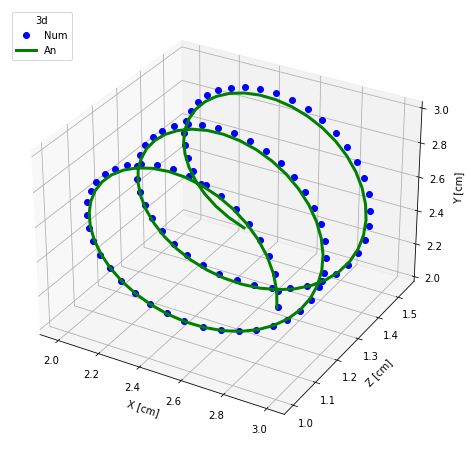

In [5]:

def plot_3d(df):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(df.x, df.z, df.y, 'b.', markersize = 12, label = "Num")
    ax.plot(df.an_x, df.an_z, df.an_y,  'g-', linewidth = 3, label = "An")
    ax.set_xlabel('X [cm]')
    ax.set_ylabel('Z [cm]')
    ax.set_zlabel('Y [cm]')
    plt.legend(loc = 'upper left', title="3d")
    plt.show()

plot_3d(df)


Text(0, 0.5, 'X [cm]')

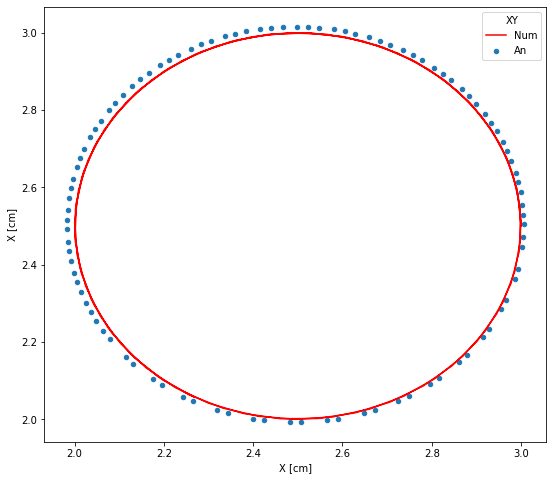

In [6]:
ax = df.plot.scatter(x='x', y='y', label="Num")
ax.legend(title="XY")
df.plot('an_x', 'an_y', ax=ax, label="An", color='red')
ax.set_xlabel('X [cm]')
ax.set_ylabel('X [cm]')

Text(0, 0.5, 'X [cm]')

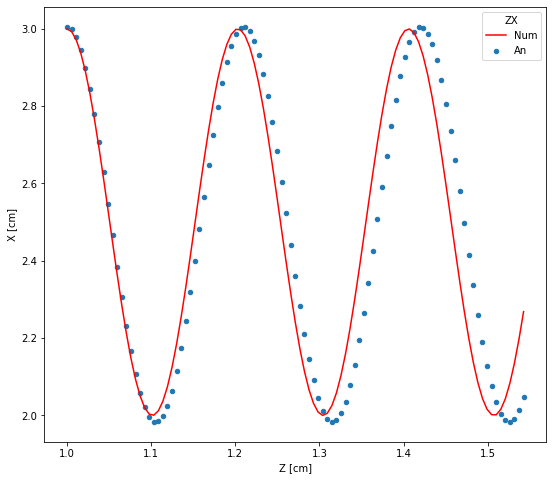

In [7]:
ax = df.plot.scatter(x='z', y='x', label="Num")
ax.legend(title="ZX")
df.plot('an_z', 'an_x', ax=ax, label="An", color='red')
ax.set_xlabel('Z [cm]')
ax.set_ylabel('X [cm]')

Text(0, 0.5, 'YS [cm]')

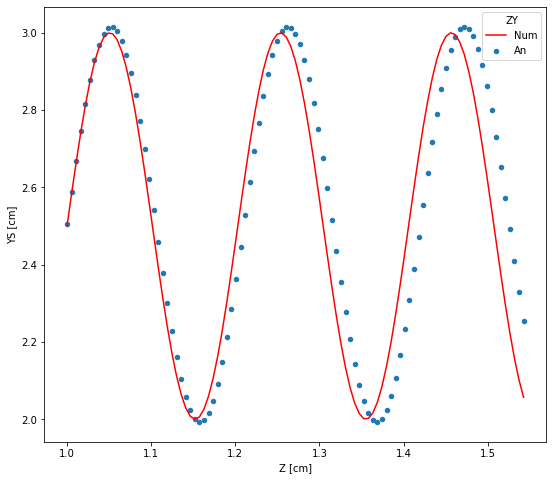

In [8]:
ax = df.plot.scatter(x='z', y='y', label="Num")
ax.legend(title="ZY")
df.plot('an_z', 'an_y', ax=ax, label="An", color='red')
ax.set_xlabel('Z [cm]')
ax.set_ylabel('YS [cm]')

Text(0, 0.5, 'E [erg]')

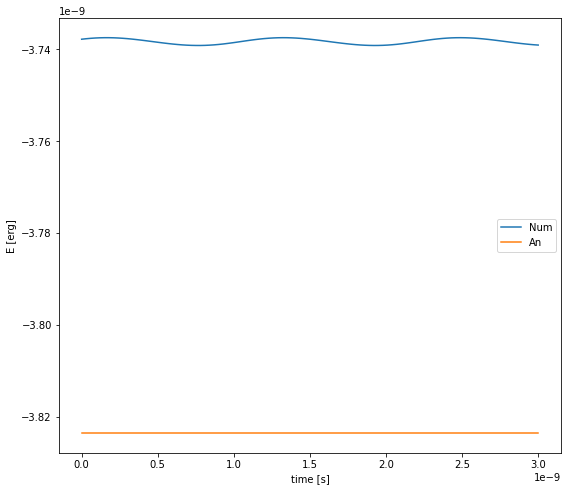

In [9]:
ax = df.plot('time', ['E', 'an_E'], label=["Num", "An"])
ax.set_xlabel('time [s]')
ax.set_ylabel('E [erg]')